# Linear Regression Example Notebook
This example shows how to predict house prices using Linear Regression.

The goal is to give a basic introduction to regression problems, so many things will be simplified.

The data is from the Ames Housing dataset, obtained through [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).

Regarding notation, $a$ is a scalar, $\mathbf{a}$ is a vector (column vector), and $\mathbf{A}$ is a matrix.


## Imports

In [1]:
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Array computation
import pandas as pd  # Handling table data
import seaborn as sns  # Plotting 
from IPython.display import display, clear_output  # Plotting
%matplotlib inline
sns.set_theme()
sns.set_style("ticks")

## Load and Process data
For simplicity, we will only consider the LotArea feature and the first 50 examples of the dataset for training.

In [2]:
# Load and show full training data
train_data_frame = pd.read_csv("Data\\train.csv")
train_data_frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_data_frame = train_data_frame[["LotArea", "SalePrice"]]  # Select/Index only the LotArea and SalePrice columns
train_data_frame

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


Text(0.5, 8.95999999999998, 'Lot Area (thousands sq. feet)')

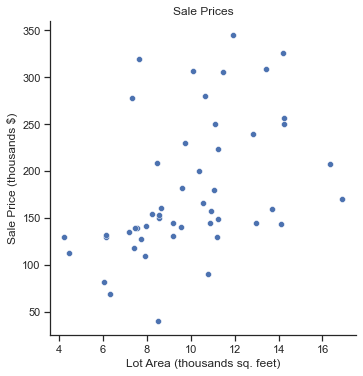

In [4]:
# Take the first 50 examples
train_data_frame = train_data_frame[:50]

# Scale the Sale Price and Lot Area
train_data_frame[["SalePrice"]] /= 1000 
train_data_frame[["LotArea"]] /= 1000

# Create scatter plot
sns.relplot(x="LotArea", y="SalePrice", data=train_data_frame)
plt.title("Sale Prices")
plt.ylabel("Sale Price (thousands $)")
plt.xlabel("Lot Area (thousands sq. feet)")

Let's reshape our data so it's easier to work with.

We want train_xs to be a matrix with shape ($m$, $n + 1$) with the first column being all ones (in our case $m = 50$ and $n = 1$): 
\begin{align}
\mathbf{X} = \begin{bmatrix} x^1_{0} && \ldots && x^1_{n} \\ \vdots && \ddots && \vdots \\ x^m_{0} && \ldots && x^m_{n} \end{bmatrix}
\end{align}

We want train_ys to be a vector with shape ($m$, 1):
\begin{align}
\mathbf{y} = \begin{bmatrix} y^1 \\ \vdots \\ y^m \end{bmatrix}
\end{align}

In [5]:
train_xs = train_data_frame[["LotArea"]].to_numpy()
train_ys = train_data_frame[["SalePrice"]].to_numpy()
train_ys

array([[208.5  ],
       [181.5  ],
       [223.5  ],
       [140.   ],
       [250.   ],
       [143.   ],
       [307.   ],
       [200.   ],
       [129.9  ],
       [118.   ],
       [129.5  ],
       [345.   ],
       [144.   ],
       [279.5  ],
       [157.   ],
       [132.   ],
       [149.   ],
       [ 90.   ],
       [159.   ],
       [139.   ],
       [325.3  ],
       [139.4  ],
       [230.   ],
       [129.9  ],
       [154.   ],
       [256.3  ],
       [134.8  ],
       [306.   ],
       [207.5  ],
       [ 68.5  ],
       [ 40.   ],
       [149.35 ],
       [179.9  ],
       [165.5  ],
       [277.5  ],
       [309.   ],
       [145.   ],
       [153.   ],
       [109.   ],
       [ 82.   ],
       [160.   ],
       [170.   ],
       [144.   ],
       [130.25 ],
       [141.   ],
       [319.9  ],
       [239.686],
       [249.7  ],
       [113.   ],
       [127.   ]])

In [6]:
# Add extra feature to xs
train_xs = train_xs.reshape(50, 1)
ones = np.ones(shape=(50, 1))
train_xs = np.c_[ones, train_xs]  # Shape is now (50, 2)
train_xs

array([[ 1.   ,  8.45 ],
       [ 1.   ,  9.6  ],
       [ 1.   , 11.25 ],
       [ 1.   ,  9.55 ],
       [ 1.   , 14.26 ],
       [ 1.   , 14.115],
       [ 1.   , 10.084],
       [ 1.   , 10.382],
       [ 1.   ,  6.12 ],
       [ 1.   ,  7.42 ],
       [ 1.   , 11.2  ],
       [ 1.   , 11.924],
       [ 1.   , 12.968],
       [ 1.   , 10.652],
       [ 1.   , 10.92 ],
       [ 1.   ,  6.12 ],
       [ 1.   , 11.241],
       [ 1.   , 10.791],
       [ 1.   , 13.695],
       [ 1.   ,  7.56 ],
       [ 1.   , 14.215],
       [ 1.   ,  7.449],
       [ 1.   ,  9.742],
       [ 1.   ,  4.224],
       [ 1.   ,  8.246],
       [ 1.   , 14.23 ],
       [ 1.   ,  7.2  ],
       [ 1.   , 11.478],
       [ 1.   , 16.321],
       [ 1.   ,  6.324],
       [ 1.   ,  8.5  ],
       [ 1.   ,  8.544],
       [ 1.   , 11.049],
       [ 1.   , 10.552],
       [ 1.   ,  7.313],
       [ 1.   , 13.418],
       [ 1.   , 10.859],
       [ 1.   ,  8.532],
       [ 1.   ,  7.922],
       [ 1.   ,  6.04 ],


## Hypothesis Definition
We now want to implement Linear Regression to predict *Sale Price* from *Lot Area*. 

The hypothesis function $h$ is defined as follows for a single example $\mathbf{x}^k$ containing $n$ features:


\begin{align}
h_\theta(\mathbf{x}^k) & = \theta_0 + \theta_1x^k_1 + \theta_2x^k_2 + \ldots + \theta_nx^k_n \\
& = \sum_{i=0}^n \theta_ix^k_i \\
& = \begin{bmatrix} \theta_0 && \ldots && \theta_n \end{bmatrix} \begin{bmatrix} x^k_0 \\ \vdots \\ x^k_n \end{bmatrix} \\
& = \boldsymbol{\theta}^T\mathbf{x}^k
\end{align}

We want to implement a batched method which computes the hypothesis for all examples in one go. To do so, we can implement the following version:

\begin{align}
h_\theta(\mathbf{X}) & =  \mathbf{X} \boldsymbol{\theta} = \begin{bmatrix} x^1_{0} && \ldots && x^1_{n} \\ \vdots && \ddots && \vdots \\ x^m_{0} && \ldots && x^m_{n} \end{bmatrix} \begin{bmatrix} \theta_0 \\ \vdots \\ \theta_n \end{bmatrix}  = \begin{bmatrix} h_\theta(\mathbf{x}^1) \\ \vdots \\ h_\theta(\mathbf{x}^m) \end{bmatrix}
\end{align}


In [7]:
# In our case we only need 2 thetas
parameters = np.array([[0.001], [0.001]])  # Shape is (2, 1)

def linear_hypothesis(thetas, input_data):
    """
    thetas: parameters for the hypothesis, expected shape is (2, 1)
    input_data: full matrix of input data, expected shape is (n_samples, 2)

    return: hypothesis result for each input sample, shape is (n_samples, 1)
    """
    return np.dot(input_data, thetas)


## Define Learning Algorithm
First step, define the cost function for the entire dataset:
\begin{align}
J_\theta(\mathbf{X}, \mathbf{y}) = \frac{1}{2}\sum_{k=1}^m (h_\theta(\mathbf{x}^k) - \mathbf{y}^k)^2
\end{align}

This standard definition sums over the squared error for each example in the set to produce a single scalar for the cost.

We can instead implement a vectorized form:
\begin{align}
J_\theta(\mathbf{X}, \mathbf{y}) = \frac{1}{2} (h_\theta(\mathbf{X}) - \mathbf{y})^T (h_\theta(\mathbf{X}) - \mathbf{y})
\end{align}


In [8]:
def cost_function(thetas, input_data, target_data):
    """
    thetas: parameters for the hypothesis, expected shape is (2, 1)
    input_data: full matrix of input data, expected shape is (n_samples, 2)
    target_data: full vector of target data, expected shape is (n_samples, 1)

    return: total aggregate cost
    """
    hypothesis_result = linear_hypothesis(thetas, input_data)

    return (1/2) * np.dot((hypothesis_result - target_data).T, (hypothesis_result - target_data))[0][0]

Second step, define gradient descent per epoch, where each parameter $\theta_i$ is updated following:
\begin{align}
\theta_i & ≔ \theta_i - \alpha \frac{\partial}{\partial \theta_i} J_\theta(\mathbf{X}, \mathbf{y}) \\
& ≔ \theta_i - \alpha \sum_{k=1}^m (h_\theta(\mathbf{x}^k) - y^k)x^k_i
\end{align}
As before, we can instead implement a vectorized operation:

\begin{align}
\boldsymbol{\theta} & ≔ \boldsymbol{\theta} - \alpha \mathbf{X}^T(h_\theta(\mathbf{X}) - \mathbf{y})
\end{align}

In [9]:
def gradient_descent(thetas, input_data, target_data, alpha=0.1):
    """
    thetas: parameters for the hypothesis, expected shape is (2, 1)
    input_data: full matrix of input data, expected shape is (n_samples, 2)
    target_data: full vector of target data, expected shape is (n_samples, 1)
    alpha: learning rate, defaults to 0.1

    return: New parameters, shape is (2, 1)
    """
    return thetas - alpha * np.dot(input_data.T, linear_hypothesis(thetas, input_data) - target_data)


## Train
Now we can train the model for multiple epochs and see how the result!

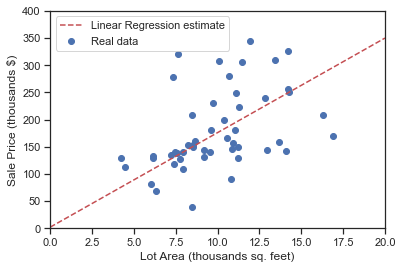

In [10]:
# Let's redefine the parameters so we can try different starting points
parameters = np.array([[0.01], [0.01]])

# Create array of xs to use for plotting 
x_space = np.linspace(0, 20, 500).reshape(500, 1)
ones = np.ones(shape=(500, 1))
x_added = np.c_[ones, x_space]

def create_fig():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1) 

    return fig, ax

def plot(ax, fig, parameters):
    current_line = linear_hypothesis(parameters, x_added)

    ax.cla()
    ax.set_ylim([0, 400])
    ax.set_xlim([0, 20])
    ax.set_ylabel("Sale Price (thousands $)")
    ax.set_xlabel("Lot Area (thousands sq. feet)")
    ax.plot(x_space.flatten(), current_line.flatten(), "r--", label="Linear Regression estimate")
    ax.scatter(train_data_frame[["LotArea"]], train_data_frame[["SalePrice"]], label="Real data")
    ax.legend(loc="upper left")
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.5)

def train(parameters, n_epochs=15):
    # Create empty figure for plotting
    fig, ax = create_fig()
    
    # Iterate over n_epochs
    for epoch in range(n_epochs):        
        parameters = gradient_descent(parameters, train_xs, train_ys, alpha=0.0001)
        plot(ax, fig, parameters)
    
    return parameters

trained_parameters = train(parameters)

In [11]:
print(f"Final average training cost: {cost_function(trained_parameters, train_xs, train_ys):.2f}")
print(f"Final trained parameters: {trained_parameters}")

Final average training cost: 111906.72
Final trained parameters: [[ 2.01086818]
 [17.39416509]]


 # Library Version
Insted of implementing everything by hand, we can use a library.

The next cells show how to use the sklearn library for linear regression. Note that the Linear Regression implemented by the library uses the Ordinary Least Squares method instead of Gradient Descent.

This method returns the optimal parameters by setting the gradient of the cost function $J$ to 0:

\begin{align}
J_\theta(\mathbf{X}, \mathbf{y}) &= \frac{1}{2} (h_\theta(\mathbf{X}) - \mathbf{y})^T (h_\theta(\mathbf{X}) - \mathbf{y}) \\
\nabla_\theta J_\theta(\mathbf{X}, \mathbf{y}) &= \mathbf{X}^T\mathbf{X}\boldsymbol\theta - \mathbf{X}^T\mathbf{y} = 0 \\
\mathbf{X}^T\mathbf{X}\boldsymbol\theta &= \mathbf{X}^T\mathbf{y} \\
\boldsymbol\theta &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{align}

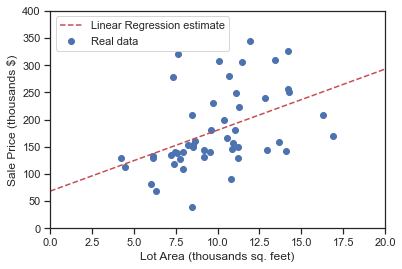

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor = regressor.fit(train_xs[:, 1:], train_ys)  # Remove the extra features from x
sklearn_params = np.array([[regressor.intercept_[0]], [regressor.coef_[0, 0]]])  # Write the learned parameters as before
fig, ax = create_fig()
plot(ax, fig, sklearn_params)

In [13]:
print(f"Final average training cost: {cost_function(sklearn_params, train_xs, train_ys):.2f}")
print(f"Final trained parameters: {sklearn_params}")

Final average training cost: 103494.53
Final trained parameters: [[68.29682524]
 [11.22112049]]
